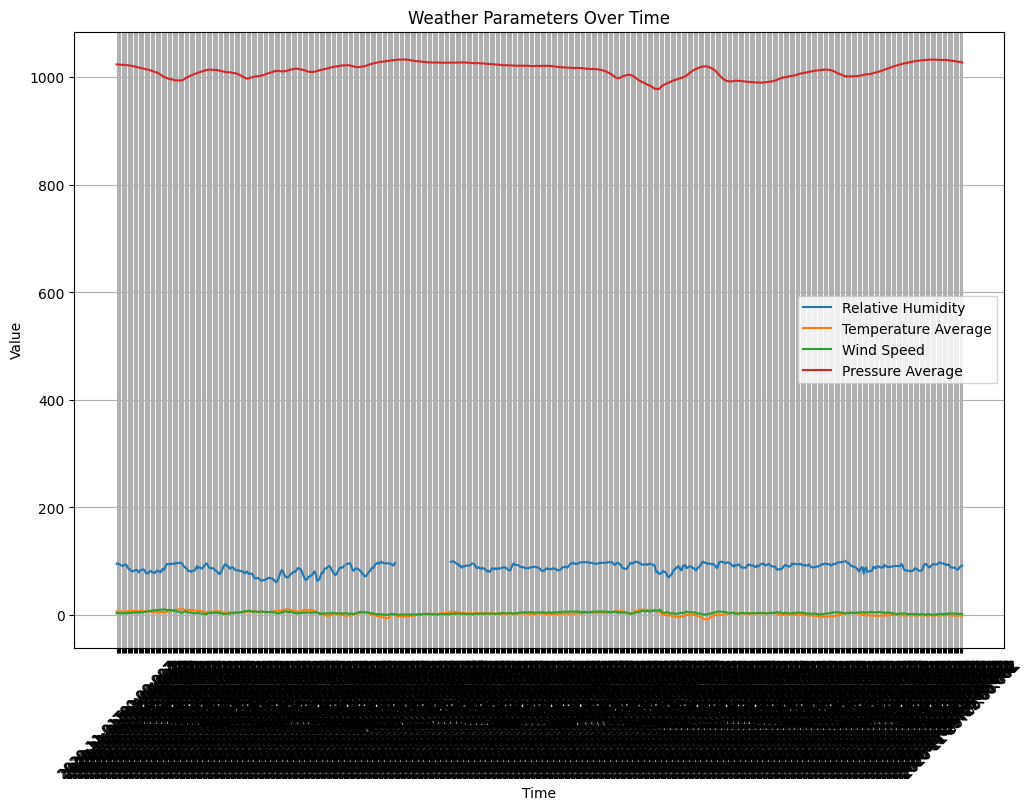

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
CSV_NAME = 'weather_2020-11.csv'
data = pd.read_csv(CSV_NAME)

# Filter and extract relevant data
relevant_params = ['RH_PT1H_AVG', 'TA_PT1H_AVG', 'WS_PT1H_AVG', 'PRA_PT1H_ACC', 'PA_PT1H_AVG']
relevant_data = data[data['ParameterName'].isin(relevant_params)].copy()

# Convert ParameterValue to numeric, handling errors with NaN
relevant_data['ParameterValue'] = pd.to_numeric(relevant_data['ParameterValue'], errors='coerce')

# Pivot the table to have each parameter as a column
pivot_table = relevant_data.pivot_table(values='ParameterValue', index='Time', columns='ParameterName')

# Plotting the data
plt.figure(figsize=(12, 8))

# Plot Relative Humidity
plt.plot(pivot_table.index, pivot_table['RH_PT1H_AVG'], label='Relative Humidity')

# Plot Temperature Average
plt.plot(pivot_table.index, pivot_table['TA_PT1H_AVG'], label='Temperature Average')

# Plot Wind Speed
plt.plot(pivot_table.index, pivot_table['WS_PT1H_AVG'], label='Wind Speed')

# Plot Pressure Average
plt.plot(pivot_table.index, pivot_table['PA_PT1H_AVG'], label='Pressure Average')

# Check if 'PRA_PT1H_ACC' exists before plotting Precipitation Amount
if 'PRA_PT1H_ACC' in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table['PRA_PT1H_ACC'], label='Precipitation Amount')

plt.title('Weather Parameters Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()